# O que fazer
* Compreender os dados
* Tratar e Limpar os dados
* Análisar os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("./winemag-data-130k-v2.csv")

In [7]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### Sumario
- **unnamed**: Coluna de index
- **country**: País onde foi feito
- **description**: Descrição do vinho
- **designation**: Um termo que identifica a origem, tipo ou características específicas de um vinho.
- **points**: Número de pontos que o vinho obteve em sua avaliação
- **price**: Preço da garrafa do vinho
- **province**: Província onde o vinho foi feito
- **region_1**: A região onde o vinho foi feito
- **region_2**: Região mais específica
- **taster_name**: Nome do avaliador
- **taster_twitter_handle**: Perfil do twitter do avaliador
- **title**: Nome do vinho
- **variety**: Tipo de uvas utilizadas
- **winery**: Adega de criação do vinho

### Classificação dos vinhos por pontos
* 80 - 82 : Aceitavel
* 83 - 86 : Bom
* 87 - 89 : Muito Bom
* 90 - 93 : Exelente
* 94 - 97 : Soberbo
* 98 - 100 : Classico

### Análises
1. **Quais países possuem os vinhos com maior pontuação?**
2. **Há alguma correlação entre o preço do vinho e sua pontuação?**
3. **Quais são as uvas mais utilizadas nos vinhos com maior avaliação?**
4. **Qual o melhor vinho em cada faixa de preço?**


### Outras Perguntas (Fazer no PowerBI)
1. **Qual é o preço médio dos vinhos em cada província?**


# Análises do Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


### Informações do Dataset
#### Informações Gerais
* 129.971 Linhas.
* 14 Colunas

#### Colunas com dados faltantes (Só quantidade significativa)
* designation -> 92.506 dados de 129.971.
* region_2 -> 50.511 dados de 129.971.
* taster_twitter_handle -> 98.758 dados de 129.971.

## Retirar colunas que não são tão interessantes para análise

In [135]:
df_copy = df.copy()

In [136]:
df_copy = df_copy.drop(["Unnamed: 0", "designation", "region_1", "region_2", "taster_name", "taster_twitter_handle"], axis=1)
df_copy.head()

,country,description,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [137]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   title        129971 non-null  object 
 6   variety      129970 non-null  object 
 7   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.9+ MB


### Dados Faltantes
- **country**
- **price**
- **province**
- **variety**

### Verificar a quantidade de dados faltantes e tomar uma decisão entre apagar as linhas ou completar de outra forma

In [138]:
porcentagem_valores_nulos_country = df_copy["country"].count() / df_copy.shape[0];
print(f"Valores não nulos {df_copy["country"].count()}")
print(f"Quantidade Total de linhas {df_copy.shape[0]}")
print(f"Porcentagem de valores não nulos {porcentagem_valores_nulos_country * 100:.2f}%")

Valores não nulos 129908
Quantidade Total de linhas 129971
Porcentagem de valores não nulos 99.95%


In [139]:
porcentagem_valores_nulos_price = df_copy["price"].count() / df_copy.shape[0];
print(f"Valores não nulos {df_copy["price"].count()}")
print(f"Quantidade Total de linhas {df_copy.shape[0]}")
print(f"Porcentagem de valores não nulos {porcentagem_valores_nulos_price * 100:.2f}%")

Valores não nulos 120975
Quantidade Total de linhas 129971
Porcentagem de valores não nulos 93.08%


In [140]:
porcentagem_valores_nulos_province = df_copy["province"].count() / df_copy.shape[0];
print(f"Valores não nulos {df_copy["province"].count()}")
print(f"Quantidade Total de linhas {df_copy.shape[0]}")
print(f"Porcentagem de valores não nulos {porcentagem_valores_nulos_province * 100:.2f}%")

Valores não nulos 129908
Quantidade Total de linhas 129971
Porcentagem de valores não nulos 99.95%


In [141]:
porcentagem_valores_nulos_uva = df_copy["variety"].count() / df_copy.shape[0];
print(f"Valores não nulos {df_copy["variety"].count()}")
print(f"Quantidade Total de linhas {df_copy.shape[0]}")
print(f"Porcentagem de valores não nulos {porcentagem_valores_nulos_uva * 100:.2f}%")

Valores não nulos 129970
Quantidade Total de linhas 129971
Porcentagem de valores não nulos 100.00%


#### Como a coluna que mais falta dados é a de price, e só falta 7%, ou seja ainda tem 93% dos dados não nulos e a base de dados é suficientemente grande, removo as linhas com dados nulos

In [142]:
df_copy = df_copy.dropna(subset=["country", "price", "province", "variety"])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120915 entries, 1 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   title        120915 non-null  object 
 6   variety      120915 non-null  object 
 7   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.3+ MB


# Análise Exploratória

In [143]:
df_copy.describe()

,points,price
count,120915.000000,120915.000000
mean,88.421726,35.368796
std,3.044954,41.031188
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


Text(0, 0.5, 'Frequencia')

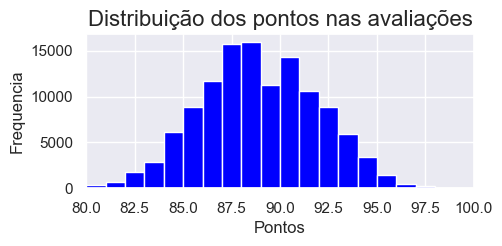

In [144]:
plt.figure(figsize=(5,2))
plt.hist(data=df_copy, x="points", bins=np.arange(80, 100 + 1, 1), color="blue")
plt.xlim(80, 100)
plt.title("Distribuição dos pontos nas avaliações", fontsize=16)
plt.xlabel("Pontos")
plt.ylabel("Frequencia")

Text(0, 0.5, 'Frequencia')

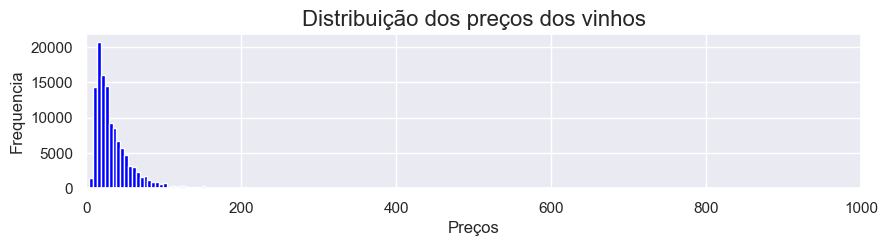

In [145]:
plt.figure(figsize=(10,2))
plt.hist(data=df_copy, x="price", bins=np.arange(4, 1000 + 1, 5), color="blue")
plt.xlim(0, 1000)
plt.title("Distribuição dos preços dos vinhos", fontsize=16)
plt.xlabel("Preços")
plt.ylabel("Frequencia")

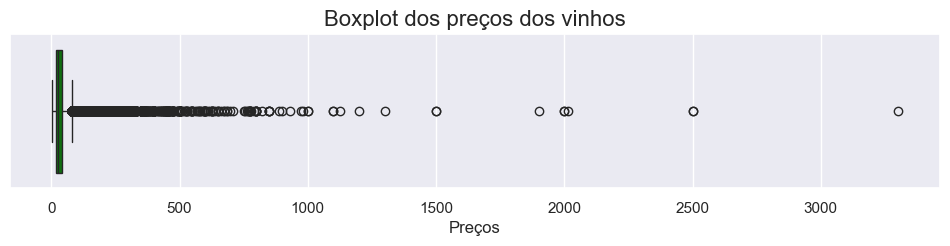

In [146]:
# Plotando o boxplot
plt.figure(figsize=(12, 2))  # Tamanho do gráfico
sns.boxplot(data=df_copy, x="price", color="green")
plt.title("Boxplot dos preços dos vinhos", fontsize=16)
plt.xlabel("Preços")
plt.show()

In [147]:
df_copy["price"].describe()

count    120915.000000
mean         35.368796
std          41.031188
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

## Paises que mais produzem vinhos

In [148]:
vinhos_top_10 = df_copy["country"].value_counts()[:10]
vinhos_top_10

country
US           54265
France       17776
Italy        16914
Spain         6573
Portugal      4875
Chile         4415
Argentina     3756
Austria       2799
Australia     2294
Germany       2120
Name: count, dtype: int64

Text(0, 0.5, 'Total de vinhos avaliados')

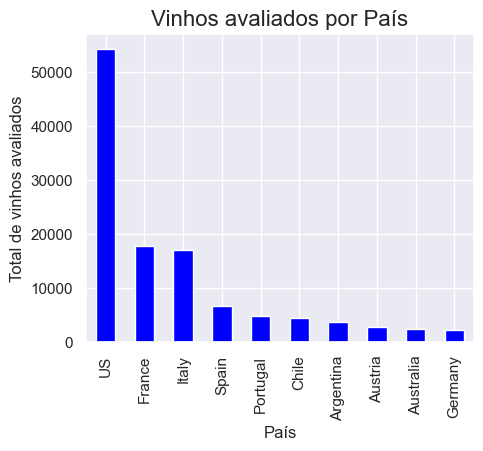

In [149]:
plt.figure(figsize=(5,4))
vinhos_top_10.plot(kind="bar", color = "blue")
plt.title("Vinhos avaliados por País", fontsize=16)
plt.xlabel("País")
plt.ylabel("Total de vinhos avaliados")

## Uvas mais usadas na fabricação de vinho

In [150]:
uvas_top_10 = df_copy["variety"].value_counts()[:10]
uvas_top_10


variety
Pinot Noir                  12785
Chardonnay                  11077
Cabernet Sauvignon           9384
Red Blend                    8466
Bordeaux-style Red Blend     5340
Riesling                     4971
Sauvignon Blanc              4780
Syrah                        4086
Rosé                         3261
Merlot                       3061
Name: count, dtype: int64

Text(0, 0.5, 'Total de vinhos utilizados')

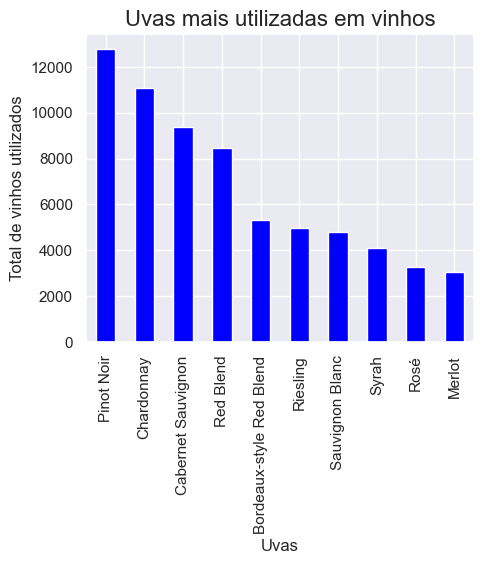

In [151]:
plt.figure(figsize=(5,4))
uvas_top_10.plot(kind="bar", color = "blue")
plt.title("Uvas mais utilizadas em vinhos", fontsize=16)
plt.xlabel("Uvas")
plt.ylabel("Total de vinhos utilizados")

## Quais paises produzem vinhos de melhor qualidade de acordo com os pontos

In [187]:
df_copy2 = df_copy.copy()
df_copy2.drop(columns=["description", "province", "title", "winery", "variety"], inplace=True)

paises_melhor_qualidade = df_copy2.groupby("country").agg("mean")
paises_melhor_qualidade = paises_melhor_qualidade.sort_values(by="points", ascending=False)[:10]
paises_melhor_qualidade.style.background_gradient(cmap='Blues',high=1, subset=["points"])

,points,price
country,,
England,91.550725,51.681159
India,90.222222,13.333333
Austria,90.190782,30.762772
Germany,89.836321,42.257547
Canada,89.377953,35.712598
Hungary,89.165517,40.648276
China,89.000000,18.000000
France,88.734867,41.139120
Luxembourg,88.666667,23.333333


## Paises que produzem vinhos "Classicos" igual ou acima de 98 pontos

In [282]:
acima_92_pontos = df_copy2[df_copy2["points"] >= 98]
acima_92_pontos["country"].value_counts()

country
US           49
France       25
Italy        25
Australia     8
Portugal      7
Germany       1
Spain         1
Name: count, dtype: int64

## Preço médio por país

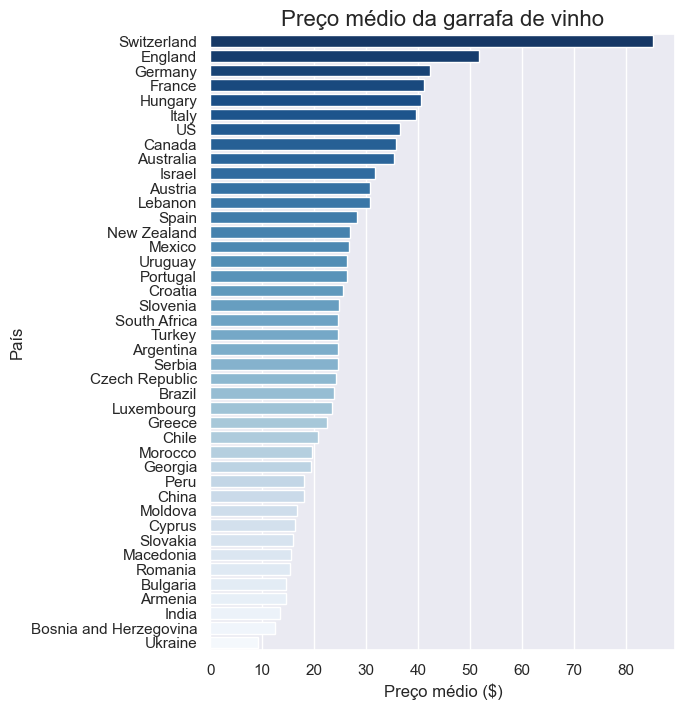

In [220]:
preco_medio_pais = df_copy2.groupby("country").agg("mean")
preco_medio_pais = preco_medio_pais.sort_values("price", ascending=False)

plt.figure(figsize=(6,8))
sns.barplot(x="price", y=preco_medio_pais.index, data=preco_medio_pais, palette="Blues_r", hue=preco_medio_pais.index)
plt.title("Preço médio da garrafa de vinho", fontsize=16)
plt.xlabel("Preço médio ($)")
plt.ylabel("País")
plt.show()

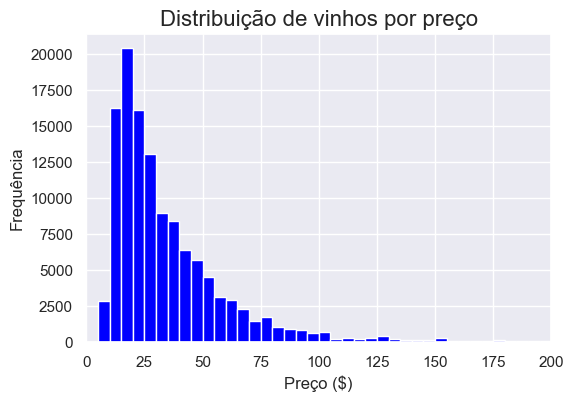

In [232]:
plt.figure(figsize=(6,4))
bins = np.arange(0, df_copy2["price"].max()+1, 5)
plt.hist(data=df_copy2, x="price", bins=bins, color="Blue")
plt.xlim(0, 200)
plt.title("Distribuição de vinhos por preço", fontsize=16)
plt.xlabel("Preço ($)")
plt.ylabel("Frequência")
plt.show()

## Correlação entre Preço e Qualidade

          points     price
points  1.000000  0.416197
price   0.416197  1.000000


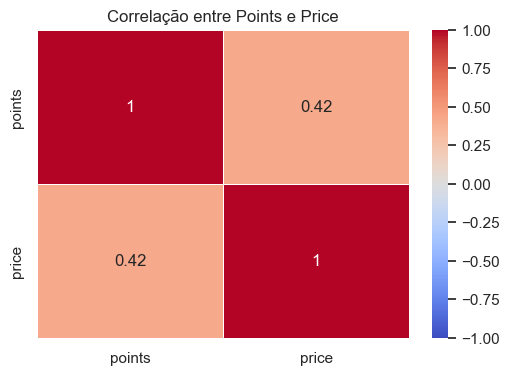

In [237]:
correlacao = df_copy2[['points', 'price']].corr()
print(correlacao)

plt.figure(figsize=(6, 4))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlação entre Points e Price")
plt.show()

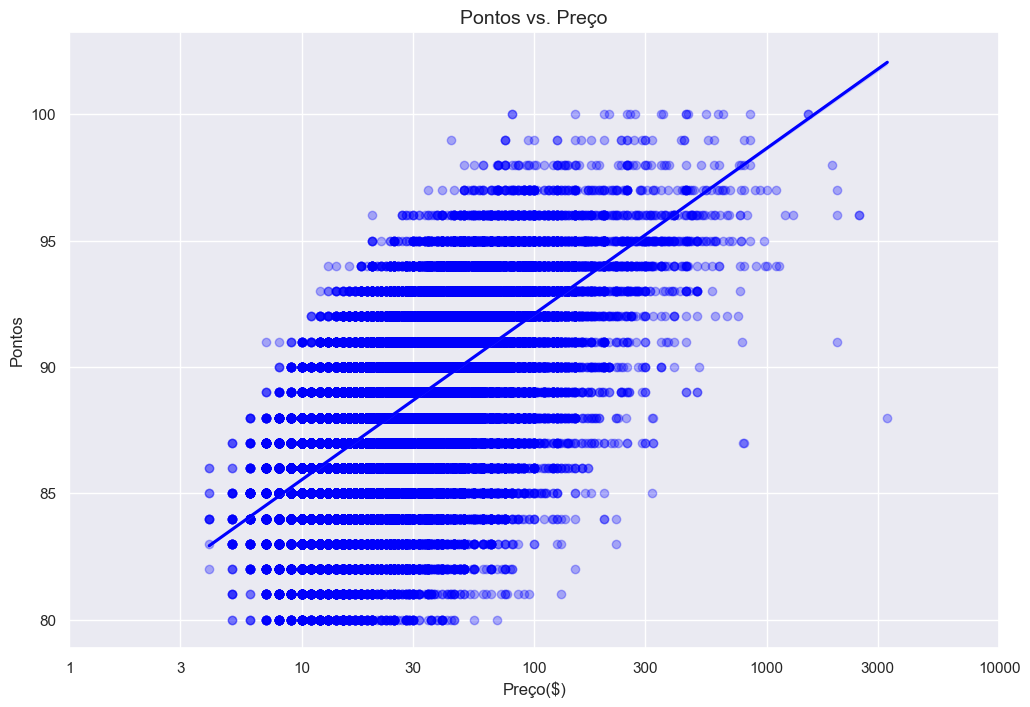

In [246]:
x = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]

plt.figure(figsize=(12, 8))
sns.regplot(x='price', y='points', data=df_copy2, color='Blue', logx=True, scatter_kws={'alpha':0.3})
plt.title("Pontos vs. Preço", fontsize=14)
plt.xscale('log')
plt.xticks(x, x)
plt.xlabel("Preço($)")
plt.ylabel("Pontos");

## Qual o melhor vinho em cada faixa de preço?

- Até 10 Dolares
- Entre 10 e 25 Dolares
- Entre 25 e 40 Dolares
- Entre 40 e 55 Dolares
- Acima de 55 Dolares

In [285]:
df_copy3 = df_copy.copy()
df_copy3.drop(columns=["description", "province", "winery", "variety"], inplace=True)
top_10_10 = df_copy3[df_copy3["price"] <= 10]

top_10_10 = top_10_10.sort_values(by=["points", "price"], ascending=[False, True])[:10]

top_10_10.style.background_gradient(cmap="Reds", high=0.5, subset=["price"])

,country,points,price,title
34629,Portugal,91,7.000000,Herdade dos Machados 2012 Toutalga Red (Alentejano)
26101,US,91,8.000000,Snoqualmie 2006 Winemaker's Select Riesling (Columbia Valley (WA))
10386,US,91,9.000000,Chateau Ste. Michelle 2011 Riesling (Columbia Valley (WA))
43977,US,91,9.000000,Chateau Ste. Michelle 2010 Dry Riesling (Columbia Valley (WA))
56988,US,91,9.000000,Barnard Griffin 2012 Fumé Blanc Sauvignon Blanc (Columbia Valley (WA))
11955,Portugal,91,10.000000,Quinta do Portal 2007 Mural Reserva Red (Douro)
18310,Portugal,91,10.000000,José Maria da Fonseca 2007 Moscatel de Setúbal
27415,US,91,10.000000,Barnard Griffin 2012 Riesling (Columbia Valley (WA))
40258,US,91,10.000000,Lujon 2015 Riesling (Willamette Valley)
43344,US,91,10.000000,Lujon 2015 Riesling (Willamette Valley)


In [286]:
top_10_10_25 = df_copy3.query("price > 10 and price <= 25")

top_10_10_25 = top_10_10_25.sort_values(by=["points", "price"], ascending=[False, True]).head(10)

top_10_10_25.style.background_gradient(cmap="Reds", high=0.5, subset=["price"])

,country,points,price,title
101580,US,96,20.000000,Rulo 2007 Syrah (Columbia Valley (WA))
5011,US,95,20.000000,Dunham 2010 Lewis Estate Vineyard Riesling (Columbia Valley (WA))
15196,France,95,20.000000,Alain Brumont 2010 Château Bouscassé Red (Madiran)
76570,US,95,20.000000,Januik 2012 Bacchus Vineyard Riesling (Columbia Valley (WA))
126242,US,95,20.000000,Poet's Leap 2009 Riesling (Columbia Valley (WA))
74813,US,95,22.000000,EOS 2006 Tears of Dew Late Harvest Moscato (Paso Robles)
48376,US,95,24.000000,Sineann 2013 Riesling (Oregon)
58374,US,95,24.000000,La Clarine Farm 2011 Cedarville Mourvèdre (Sierra Foothills)
9907,France,95,25.000000,Julien Schaal 2016 Kastelberg Grand Cru Schiste Riesling (Alsace)
27608,Italy,95,25.000000,Abbazia di Novacella 2015 Praepositus Kerner (Alto Adige)


In [287]:
top_10_25_40 =  df_copy3[(df_copy3["price"] > 25) & (df_copy2["price"] <= 40)]

top_10_25_40 = top_10_25_40.sort_values(by=["points", "price"], ascending=[False, True]).head(10)

top_10_25_40.style.background_gradient(cmap="Reds", high=0.5, subset=["price"])

,country,points,price,title
114981,US,97,35.000000,Donkey & Goat 2010 Fenaughty Vineyard Syrah (El Dorado)
16524,Portugal,97,40.000000,Taylor Fladgate NV 325 Anniversary (Port)
40309,Italy,96,27.000000,Isole e Olena 2010 Chianti Classico
54253,US,96,27.000000,Donkey & Goat 2012 Grenache Noir Grenache (El Dorado)
102489,US,96,27.000000,The Eyrie Vineyards 2014 Estate Chardonnay (Dundee Hills)
45992,France,96,28.000000,Château Filhot 2014 Sauternes
54311,Austria,96,28.000000,Eichinger 2014 Gaisberg Reserve Riesling (Kamptal)
9901,France,96,29.000000,Domaines Schlumberger 2014 Saering Grand Cru Riesling (Alsace)
81902,US,96,30.000000,Efeste 2009 Lola Chardonnay (Columbia Valley (WA))
109845,US,96,30.000000,Sineann 2015 TFL Pinot Noir (Willamette Valley)


In [288]:
top_10_40_55 =  df_copy3.query("price > 40 and price <= 55")

top_10_40_55 = top_10_40_55.sort_values(by=["points", "price"], ascending=[False, True]).head(10)

top_10_40_55.style.background_gradient(cmap="Reds", high=0.5, subset=["price"])

,country,points,price,title
118059,US,99,44.000000,Failla 2010 Estate Vineyard Chardonnay (Sonoma Coast)
1560,US,98,50.000000,Pirouette 2008 Red Wine Red (Columbia Valley (WA))
117140,US,98,55.000000,Gramercy 2010 Lagniappe Syrah (Columbia Valley (WA))
45986,France,97,45.000000,Château Coutet 2014 Barsac
4504,US,97,50.000000,Limerick Lane 2013 Rocky Knoll Zinfandel (Russian River Valley)
47432,US,97,50.000000,Williams Selyem 2010 Allen Vineyard Chardonnay (Russian River Valley)
89730,France,97,50.000000,René Muré 2015 Clos Saint Landelin Vorbourg Grand Cru Riesling (Alsace)
125831,US,97,50.000000,Dutton-Goldfield 2010 Dutton Ranch Rued Vineyard Chardonnay (Green Valley)
128268,US,97,50.000000,Trefethen 2005 Estate Cabernet Sauvignon (Oak Knoll District)
28638,US,97,52.000000,Joseph Swan Vineyards 2007 Trenton Estate Vineyard Pinot Noir (Russian River Valley)


In [289]:
top_10_55 = df_copy3[df_copy3["price"] > 55]

top_10_55 = top_10_55.sort_values(by=["points", "price"], ascending=[False, True]).head(10)

top_10_55.style.background_gradient(cmap="Reds", high=0.5, subset=["price"])

,country,points,price,title
113929,US,100,80.000000,Charles Smith 2006 Royal City Syrah (Columbia Valley (WA))
123545,US,100,80.000000,Cayuse 2008 Bionic Frog Syrah (Walla Walla Valley (WA))
58352,France,100,150.000000,Château Léoville Barton 2010 Saint-Julien
45798,US,100,200.000000,Cardinale 2006 Cabernet Sauvignon (Napa Valley)
7335,Italy,100,210.000000,Avignonesi 1995 Occhio di Pernice (Vin Santo di Montepulciano)
89728,France,100,250.000000,Louis Roederer 2008 Cristal Vintage Brut (Champagne)
36528,France,100,259.000000,Krug 2002 Brut (Champagne)
111754,Italy,100,270.000000,Casanova di Neri 2007 Cerretalto (Brunello di Montalcino)
345,Australia,100,350.000000,Chambers Rosewood Vineyards NV Rare Muscat (Rutherglen)
111756,France,100,359.000000,Château Léoville Las Cases 2010 Saint-Julien


# Conclusão

### Análises

1. **Quais países possuem os vinhos com maior pontuação?**
   - Em média, a Inglaterra tem a maior pontuação, mas em quantidade de vinhos Classicos, o Estados Unidos lidera a produção
2. **Há alguma correlação entre o preço do vinho e sua pontuação?**
    - Sim, quanto melhor o vinho, tende a ser mais caro
3. **Quais são as uvas mais utilizadas nos vinhos com maior avaliação?**
   - Pinot Noir
4. **Qual o melhor vinho em cada faixa de preço?**
        - Até 10 Dolares : "Herdade dos Machados 2012 Toutalga Red (Alentejano)"
        - Entre 10 e 25 Dolares : "Rulo 2007 Syrah (Columbia Valley (WA))"
        - Entre 25 e 40 Dolares : "Donkey & Goat 2010 Fenaughty Vineyard Syrah (El Dorado)"
        - Entre 40 e 55 Dolares : "Failla 2010 Estate Vineyard Chardonnay (Sonoma Coast)"
        - Acima de 55 Dolares : "Charles Smith 2006 Royal City Syrah (Columbia Valley (WA))"


### Outras Perguntas (Fazer no PowerBI)
1. **Qual é o preço médio dos vinhos em cada província?**
